### [Using Machine Learning to programmatically determine Stock Support and Resistance Levels](https://medium.com/@judopro/using-machine-learning-to-programmatically-determine-stock-support-and-resistance-levels-9bb70777cf8e)

In [22]:
import datetime
import pytz
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.ticker as mpticker
import pandas
import numpy
import warnings

from mpl_finance import candlestick_ohlc

import yfinance as yf
yf.pdr_override()

In [23]:
def get_optimum_clusters(df, saturation_point=0.05):
    '''
    :param df: dataframe
    :param saturation_point: The amount of difference we are willing to detect
    :return: clusters with optimum K centers
    This method uses elbow method to find the optimum number of K clusters
    We initialize different K-means with 1..10 centers and compare the inertias
    If the difference is no more than saturation_point, we choose that as K and move on
    '''

    wcss = []
    k_models = []

    size = min(11, len(df.index))
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)

    # Compare differences in inertias until it's no more than saturation_point
    optimum_k = len(wcss)-1
    for i in range(0, len(wcss)-1):
        diff = abs(wcss[i+1] - wcss[i])
        if diff < saturation_point:
            optimum_k = i
            break

    print("Optimum K is " + str(optimum_k + 1))
    optimum_clusters = k_models[optimum_k]

    return optimum_clusters


In [24]:
def plot_stock_data(data):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax1 = plt.subplot2grid((5,1), (0,0), rowspan=4)
    ax2 = plt.subplot2grid((5,1), (4,0), sharex=ax1)

    ax1.set_title("{} - {}".format(symbol, start))
    ax1.set_facecolor("#131722")
    ax1.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))

    candlestick_ohlc(ax1, data.to_numpy(), width=8, colorup='#77d879', colordown='#db3f3f')

    ax2.bar(data['Time'], data['Volume'], width=30)
    ax2.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))
    fig.subplots_adjust(hspace=0)
    fig.autofmt_xdate()
    return ax1

In [25]:
def mydate(x,pos):
    try:
        return datetime.datetime.fromtimestamp(x, tz=est).strftime(date_format)
    except IndexError:
        return ''

c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: 

Optimum K is 10


c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SPY\anaconda3\envs\Learning_PY\lib\site-packages\sklearn\cluster\_kmeans.py:1332: 

Optimum K is 10


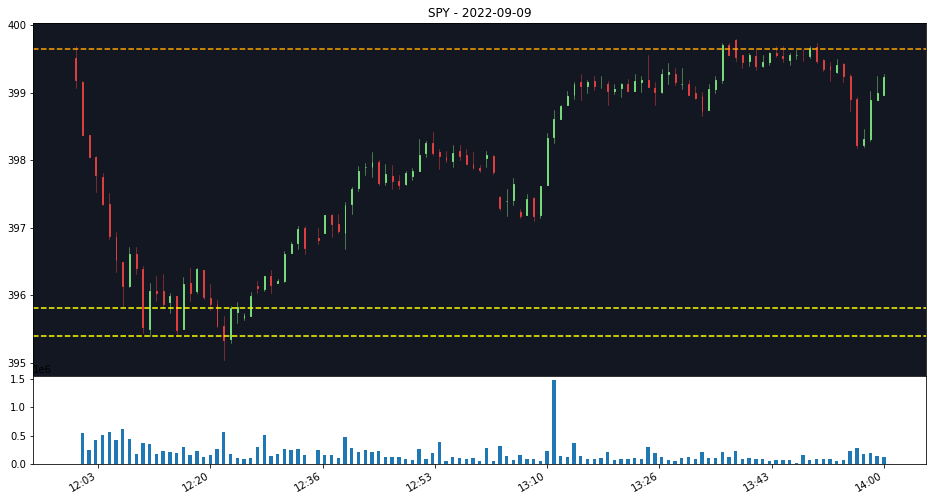

                                   Time        Open        High         Low  \
Datetime                                                                      
2022-09-08 12:00:00-04:00  1.662653e+09  399.510010  399.690002  399.070007   
2022-09-08 12:01:00-04:00  1.662653e+09  399.160004  399.170013  398.364990   
2022-09-08 12:02:00-04:00  1.662653e+09  398.375000  398.375000  398.049988   
2022-09-08 12:03:00-04:00  1.662653e+09  398.049988  398.059998  397.524994   
2022-09-08 12:04:00-04:00  1.662653e+09  397.750000  397.809998  397.341003   
...                                 ...         ...         ...         ...   
2022-09-08 13:56:00-04:00  1.662660e+09  398.910004  398.940002  398.179993   
2022-09-08 13:57:00-04:00  1.662660e+09  398.220001  398.459991  398.200012   
2022-09-08 13:58:00-04:00  1.662660e+09  398.309998  399.029999  398.290009   
2022-09-08 13:59:00-04:00  1.662660e+09  398.890015  399.250000  398.890015   
2022-09-08 14:00:00-04:00  1.662660e+09  398.970001 

In [26]:
symbol = "SPY"
start = "2022-09-09"
end = "2022-09-13"
est = pytz.timezone('US/Eastern')
date_format = "%H:%M"

ticker = yf.Ticker(symbol)
data = ticker.history(period="1d", interval="1m",start=start, end=end, prepost=False, actions=False)
data = data[:120] #30 1M candles

data["Time"] = [d.timestamp() for d in data.index]
data.Time = data.Time.tz_convert(est)
data = data[["Time", "Open", "High", "Low", "Close", "Volume"]]

ax = plot_stock_data(data)


lod, hod = 0, 0

lows = pandas.DataFrame(data=data, index=data.index, columns=["Low"])
highs = pandas.DataFrame(data=data, index=data.index, columns=["High"])

low_clusters = get_optimum_clusters(lows)
low_centers = low_clusters.cluster_centers_
low_centers = numpy.sort(low_centers, axis=0)

high_clusters = get_optimum_clusters(highs)
high_centers = high_clusters.cluster_centers_
high_centers = numpy.sort(high_centers, axis=0)

for low in low_centers[:2]:
    ax.axhline(low[0], color='yellow', ls='--')

for high in high_centers[-1:]:
    ax.axhline(high[0], color='orange', ls='--')

plt.show()

print(data)
print(low_centers)
print(high_centers)